# Was ist geschehen?

Freitag, 5. Oktober 2018: nach 9 Tagen Urlaub in Manhatten ist der Abreisetag gekommen.
Um 17:50 Uhr startet unser Transatlantikflug am Newark Airport.
Um 14:15 Uhr steigen wir in ein Taxi in 36. Street West, Ecke 6. Avenue.
Wir geraten in einen Stau und verpassen unseren Flug.

# Hätten wir ein früheres Taxi nehmen sollen?

Die Antwort auf diese Frage ist im Nachhinein einfach zu geben: wir kamen zu spät und hätten früher losfahren müssen,

# Wann hätten wir losfahren sollen?

Rechnen wir zurück.

Um 17:50 Uhr startet unser Flugzeug.

Die Fluglinie verlangt, mindestens 1 Stunde vorher am Flughafen zu sein: also 16:50 Uhr.

Selbst wenn wir da geschafft hätten, hätten wir ca. 20min benötigt um am richtigen Terminal in der Schlange zum Service anzustehen und einen Schnell-Checkin zu bekommen: also 16:30

Und das ist knapp gerechnet, wir möchten 30min Reserve für unvorhergesehene Verzögerungen am Flughafen zu haben: 16:00 Uhr

Das ergibt folgendes Modell:

    Spätester Checkin-Zeitpunkt = Abflugzeitpunkt - 1h
    Abfahrtszeitpunkt = Spätester Checkin_Zeitpunkt  - Checkin-Zeit - Reservezeit - Fahrtdauer
    Checkin-Zeit = 20min
    Reservezeit = 30min
    
    Abfahrtszeitpunkt = Abflugzeitpunkt - 1h - 20min - 30min - Fahrtdauer
                      = Abflugzeitpunkt - 1h50min - Fahrtdauer
                      = 17:50 Uhr - 1h50min - Fahrtdauer
                      = 16:00 Uhr - Fahrtdauer
                      = 16:00 Uhr - 2h45min
                      = 13:15 Uhr

Unser Taxi ist losgefahren um 14:15 Uhr und angekommen um 17:00 Uhr: also 2h45min Fahrtdauer oder 165min.


# Hätten wir wissen können, dass wann wir losfahren müssen?

Dazu sehen wir uns an: wie lange haben 2017 Taxi-Fahrten von Murray Hill zum Flughafen in Newark benötigt?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def load_taxi_trips_2017():
    return pd.read_pickle('nyc-2017-yellow-taxi-trips-to-airport-expanded.pkl.gz')

def select_trips_from_zone_to_zone(data, from_zone, to_zone):
    return data[(data.pickup_zone == from_zone) & (data.dropoff_zone == to_zone)]

In [2]:
%time tt = load_taxi_trips_2017().query('pickup_zone == "Murray Hill" and dropoff_zone == "Newark Airport"')

CPU times: user 5.41 s, sys: 3.5 s, total: 8.91 s
Wall time: 7.59 s


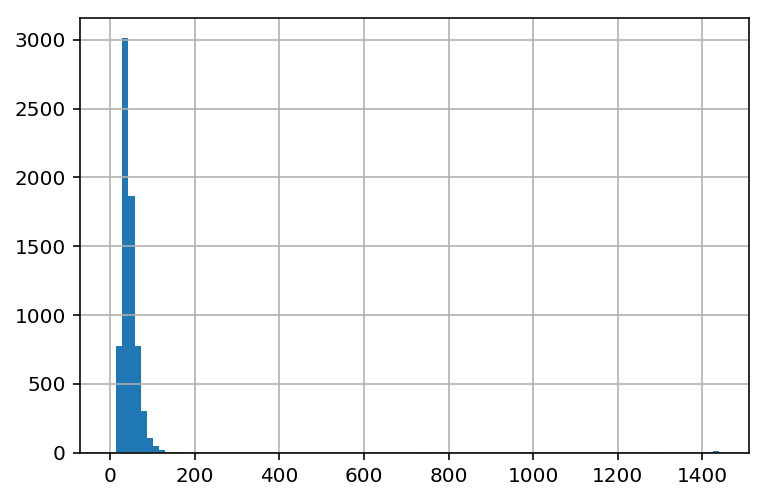

In [5]:
tt.trip_duration_minutes.hist(bins=100)

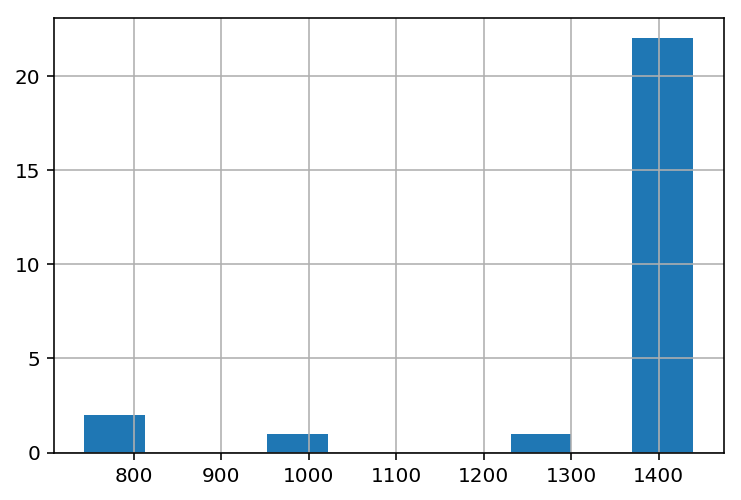

In [7]:
tt[tt.trip_duration_minutes > 200].trip_duration_minutes.hist()

In [8]:
(tt.trip_duration_minutes <= 200).mean()

0.9962460294542305

Text(0.5, 1.0, '6900 Taxifahrten in 2017 von Murray Hill nach Newark Airport')

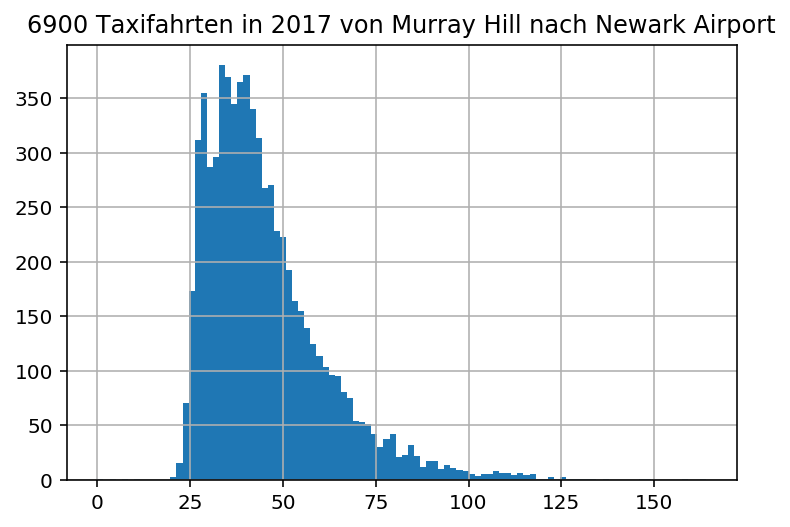

In [18]:
tt1 = tt.query('trip_duration_minutes <= 200')
tt1.trip_duration_minutes.hist(bins=100)
plt.title("{} Taxifahrten in 2017 von Murray Hill nach Newark Airport".format(tt1.shape[0]))

Text(0.5, 1.0, '5085 Taxifahrten an Werktagen in 2017 von Murray Hill nach Newark Airport')

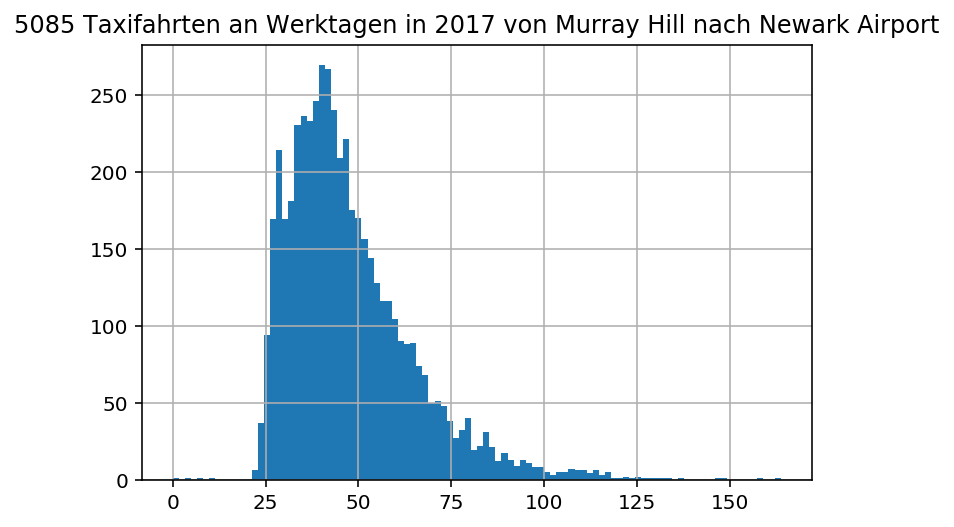

In [21]:
tt2 = tt1.query('dropoff_datetime.dt.weekday < 5')
tt2.trip_duration_minutes.hist(bins=100)
plt.title("{} Taxifahrten an Werktagen in 2017 von Murray Hill nach Newark Airport".format(tt2.shape[0]))

Text(0.5, 1.0, '1815 Taxifahrten an Wochenenden in 2017 von Murray Hill nach Newark Airport')

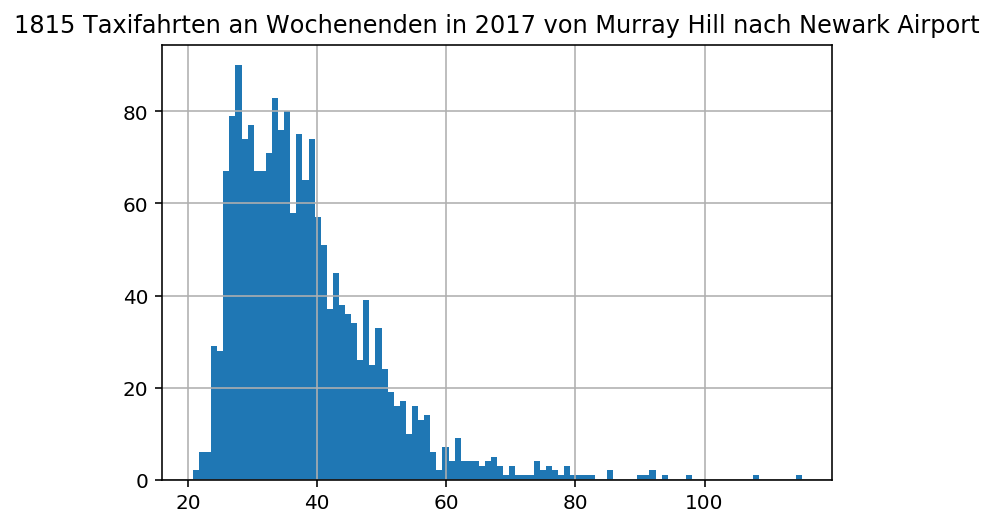

In [23]:
tt3 = tt1.query('dropoff_datetime.dt.weekday > 4')
tt3.trip_duration_minutes.hist(bins=100)
plt.title("{} Taxifahrten an Wochenenden in 2017 von Murray Hill nach Newark Airport".format(tt3.shape[0]))

In [254]:
tt = load_taxi_trips_2017()
tt1 = select_trips_from_zone_to_zone(tt, 'Murray Hill', 'Newark Airport') 

In [273]:
tt1.pickup_zone.unique().size

1

In [314]:
def trip_duration_in_minutes_min_mean_max(data):
    tdm = data.trip_duration_minutes
    return tdm.min(), tdm.mean(),tdm.max()

In [332]:
def select_trips_on_workdays(tt):
    return tt[tt.dropoff_datetime.dt.weekday < 5]
def select_trips_on_weekends(tt):
    return tt[tt.dropoff_datetime.dt.weekday > 4]
def select_trips_on_day(tt, d):
    return tt[tt.dropoff_datetime.dt.weekday == d]

def trip_duration_quantiles(data, qs):
    return data.trip_duration_minutes.quantile(qs)

tt2 = select_trips_on_workdays(tt1)
def foo(data):
    for d in range(0,7):
        quantiles = [.25, .50, .75, .80, .85, .90, .95, 1.00]
        print("{} 25%<={:.2f} 50%<={:.2f} 75%<={:.2f} 80%<={:.2f} 85%<={:.2f} 90%<={:.2f} 95%<={:.2f} 100%<={:.2f}".format(
            d, *trip_duration_quantiles(select_trips_on_day(data, d), quantiles)))
foo(tt1)

0 25%<=33.81 50%<=40.52 75%<=48.77 80%<=50.98 85%<=54.44 90%<=60.42 95%<=70.26 100%<=1432.82
1 25%<=35.95 50%<=42.68 75%<=53.33 80%<=55.85 85%<=60.50 90%<=66.48 95%<=74.07 100%<=1439.05
2 25%<=36.24 50%<=43.98 75%<=54.88 80%<=58.07 85%<=62.07 90%<=65.95 95%<=72.89 100%<=1433.53
3 25%<=37.18 50%<=45.75 75%<=58.31 80%<=61.92 85%<=66.41 90%<=72.22 95%<=84.07 100%<=1434.42
4 25%<=35.03 50%<=46.43 75%<=62.65 80%<=67.15 85%<=73.87 90%<=81.15 95%<=91.66 100%<=1439.53
5 25%<=30.58 50%<=36.21 75%<=43.02 80%<=45.76 85%<=48.29 90%<=51.25 95%<=56.85 100%<=1433.02
6 25%<=29.80 50%<=35.79 75%<=43.53 80%<=45.60 85%<=48.66 90%<=51.88 95%<=59.73 100%<=1434.07


In [335]:
tt2 = tt1[tt1.dropoff_hour.isin([15,16])]
foo(tt2)

0 25%<=40.10 50%<=46.26 75%<=52.37 80%<=54.85 85%<=59.61 90%<=62.95 95%<=70.27 100%<=84.03
1 25%<=43.02 50%<=50.88 75%<=58.85 80%<=59.83 85%<=62.11 90%<=66.77 95%<=72.30 100%<=1409.58
2 25%<=47.31 50%<=54.11 75%<=62.13 80%<=63.28 85%<=64.95 90%<=67.42 95%<=71.32 100%<=97.23
3 25%<=48.87 50%<=55.38 75%<=64.02 80%<=65.46 85%<=68.01 90%<=72.30 95%<=77.67 100%<=1426.92
4 25%<=56.47 50%<=64.64 75%<=76.58 80%<=80.12 85%<=85.26 90%<=89.76 95%<=98.63 100%<=1430.32
5 25%<=35.69 50%<=40.74 75%<=47.92 80%<=49.24 85%<=51.26 90%<=55.04 95%<=61.67 100%<=115.03
6 25%<=35.47 50%<=40.53 75%<=48.62 80%<=50.09 85%<=51.27 90%<=54.89 95%<=61.89 100%<=75.13


In [337]:
tt3 = tt2[tt2.dropoff_month.isin([8,9])]
foo(tt3)

0 25%<=41.61 50%<=45.00 75%<=48.72 80%<=48.77 85%<=50.27 90%<=51.77 95%<=64.67 100%<=77.58
1 25%<=47.18 50%<=54.57 75%<=61.85 80%<=62.07 85%<=62.89 90%<=65.70 95%<=74.81 100%<=78.42
2 25%<=51.51 50%<=59.92 75%<=64.49 80%<=65.85 85%<=66.49 90%<=69.36 95%<=72.11 100%<=79.97
3 25%<=52.03 50%<=57.68 75%<=65.18 80%<=66.85 85%<=68.32 90%<=71.04 95%<=73.25 100%<=83.13
4 25%<=64.53 50%<=73.39 75%<=81.60 80%<=86.83 85%<=90.95 90%<=96.59 95%<=103.61 100%<=116.73
5 25%<=34.49 50%<=43.87 75%<=46.88 80%<=47.64 85%<=48.38 90%<=51.98 95%<=55.02 100%<=56.65
6 25%<=36.73 50%<=46.42 75%<=51.84 80%<=52.78 85%<=54.66 90%<=56.80 95%<=64.16 100%<=75.13


# What happened?

At Friday, October 5th 2018 we tried to get our plane at 17:50 pm at Newark Airport.

You have to be at the airport on 1 hour before departure: so 16:50

We planned in lots of buffer so we were picked up by a taxi at 14:15 in Manhatten,6th avenue corner 36th street.

Guess what: we arrived at 17:05 at the airport and missed the plane.

https://www.google.com/maps/place/6th+Ave+%26+W+35th+St,+New+York,+NY+10018,+USA/@40.7504619,-73.9894728,17z/data=!3m1!4b1!4m5!3m4!1s0x89c259a9673350a3:0xa607f153af52d5ca!8m2!3d40.7504619!4d-73.9872841

# How often did it happen in 2017, that a taxi took for that too long?

In [2]:
df = pd.read_pickle('nyc-2017-yellow-taxi-trips-to-airport-expanded.pkl.gz')

In [3]:
df.dropoff_zone.cat.categories

Index(['JFK Airport', 'LaGuardia Airport', 'Newark Airport'], dtype='object')

In [188]:
def filter_trips_to_newark_airport(df):
    return df[df.dropoff_zone == 'Newark Airport']
def filter_trips_from_murray_hill(df):
    return df[df.pickup_zone == 'Murray Hill']

df1 = filter_trips_from_murray_hill(df)
df1 = filter_trips_to_newark_airport(df1)
df1.shape

(6926, 756)

In [5]:
df1.trip_duration_minutes.describe()

count    6926.000000
mean       50.134683
std        82.484907
min         0.000000
25%        33.733333
50%        41.541667
75%        52.662500
max      1439.533333
Name: trip_duration_minutes, dtype: float64

In [36]:
int(df.trip_duration_minutes.max()/15),df.trip_duration_minutes.max()

(108, 1631.45)

In [228]:
def foo(df):
    print(df.shape[0])
    for t in [30, 45, 60, 90, 120, 150, 180]:
        trips = df.trip_duration_minutes > t
        print(">{}min -> {} {:.2f}%".format(t, trips.sum(), 100*trips.mean()))
    
foo(df1[(df1.dropoff_datetime.dt.weekday == 4) & (df1.dropoff_month.isin([8,9,10])) & (df1.dropoff_hour == 15)])


22
>30min -> 22 100.00%
>45min -> 21 95.45%
>60min -> 14 63.64%
>90min -> 0 0.00%
>120min -> 0 0.00%
>150min -> 0 0.00%
>180min -> 0 0.00%


In [201]:
df1[df1.trip_duration_minutes > 180].shape

(26, 756)

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
tdm = df1.trip_duration_minutes
tdm_lt_200 = tdm[tdm < 600]

df_workdays = df1[df1.dropoff_datetime.dt.weekday <5]
tdm_workdays_tdm = df_workdays.trip_duration_minutes
tdm_workdays_tdm_lt_200 = tdm_workdays_tdm[tdm_workdays_tdm < 200]

df_weekends = df1[df1.dropoff_datetime.dt.weekday >=5]
tdm_weekends_tdm = df_weekends.trip_duration_minutes
tdm_weekends_tdm_lt_200 = tdm_weekends_tdm[tdm_weekends_tdm < 200]

In [133]:
tdm_lt_200.max()

163.98333333333332

In [134]:
range(0, 150, 15)

range(0, 150, 15)

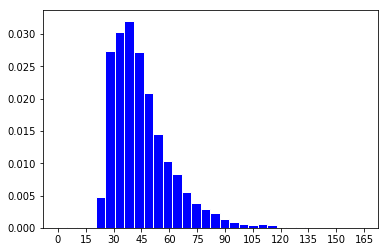

In [167]:
plt.hist(tdm_lt_200,
            density=True,
             bins=int(tdm_lt_200.max()/5), color = 'blue',
             edgecolor='white');

plt.xticks(ticks=range(0,170,15));

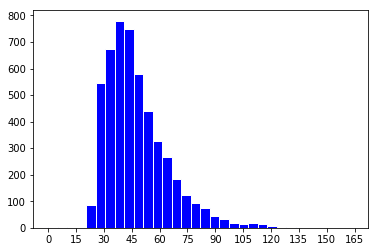

In [165]:
plt.hist(tdm_workdays_tdm_lt_200,
             bins=int(tdm_workdays_tdm_lt_200.max()/5), color = 'blue', align='mid',
             edgecolor='white');
plt.xticks(ticks=range(0,170,15));
plt.ylim=([0, 1000])

(0, 800)

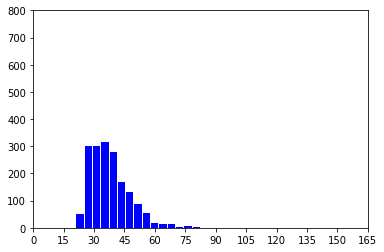

In [157]:
plt.hist(tdm_weekends_tdm_lt_200,
             bins=int(tdm_weekends_tdm_lt_200.max()/5), color = 'blue', align='mid',
             edgecolor='white');
plt.xticks(ticks=range(0,170,15));
plt.ylim([0, 800])

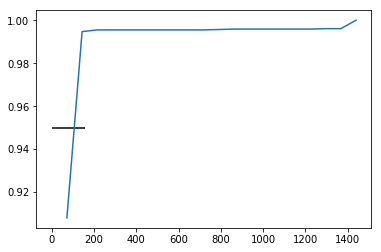

In [176]:

counts, bin_edges = np.histogram (tdm_workdays_tdm, bins=20, density=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])
plt.hlines(xmin=0, xmax=160, y=.95)

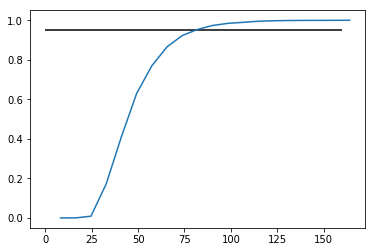

In [174]:

counts, bin_edges = np.histogram (tdm_workdays_tdm_lt_200, bins=20, density=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])
plt.hlines(xmin=0, xmax=160, y=.95)

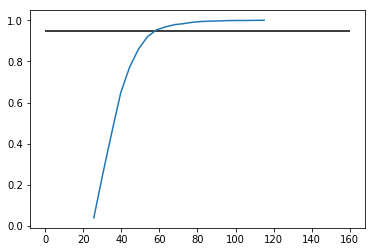

In [175]:

counts, bin_edges = np.histogram (tdm_weekends_tdm_lt_200, bins=20, density=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])
plt.hlines(xmin=0, xmax=160, y=.95)

In [139]:
tdm_lt_200_q = tdm_lt_200.quantile(np.arange(0,100, 5)/100)
tdm_lt_200_q

0.00     0.000000
0.05    26.649167
0.10    28.415000
0.15    30.116667
0.20    31.980000
0.25    33.716667
0.30    35.200000
0.35    36.894167
0.40    38.466667
0.45    39.933333
0.50    41.466667
0.55    43.200000
0.60    45.040000
0.65    47.250000
0.70    49.721667
0.75    52.466667
0.80    55.983333
0.85    60.500000
0.90    66.485000
0.95    77.150833
Name: trip_duration_minutes, dtype: float64

In [140]:
tdm_workdays_tdm_lt_200_q = tdm_workdays_tdm_lt_200.quantile(np.arange(0,100, 5)/100)
tdm_workdays_tdm_lt_200_q

0.00     0.000000
0.05    27.383333
0.10    29.366667
0.15    31.810000
0.20    33.866667
0.25    35.550000
0.30    37.383333
0.35    39.116667
0.40    40.666667
0.45    42.183333
0.50    43.883333
0.55    45.816667
0.60    47.856667
0.65    50.166667
0.70    52.830000
0.75    55.933333
0.80    59.506667
0.85    64.100000
0.90    69.920000
0.95    80.586667
Name: trip_duration_minutes, dtype: float64

In [141]:
tdm_weekends_tdm_lt_200_q = tdm_weekends_tdm_lt_200.quantile(np.arange(0,100, 5)/100)
tdm_weekends_tdm_lt_200_q

0.00    20.783333
0.05    25.783333
0.10    26.916667
0.15    27.983333
0.20    29.083333
0.25    30.141667
0.30    31.433333
0.35    32.666667
0.40    33.693333
0.45    34.848333
0.50    35.916667
0.55    37.328333
0.60    38.490000
0.65    39.693333
0.70    41.313333
0.75    43.375000
0.80    45.600000
0.85    48.483333
0.90    51.460000
0.95    57.505000
Name: trip_duration_minutes, dtype: float64

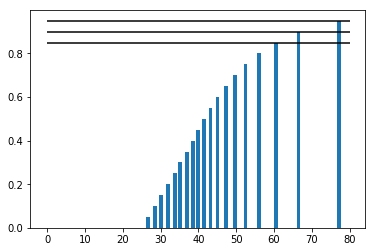

In [142]:
plt.bar(height=tdm_lt_200_q.index, x=tdm_lt_200_q.values, align='center', width=1.0);
plt.hlines(xmin=0, xmax=80, y=.95)
plt.hlines(xmin=0, xmax=80, y=.90)
plt.hlines(xmin=0, xmax=80, y=.85)

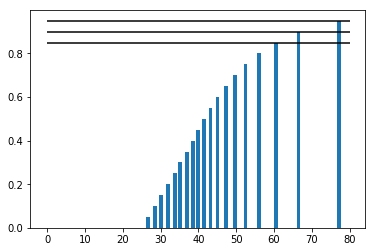

In [143]:
plt.bar(height=tdm_workdays_tdm_lt_200_q.index, x=tdm_lt_200_q.values, align='center', width=1.0);
plt.hlines(xmin=0, xmax=80, y=.95)
plt.hlines(xmin=0, xmax=80, y=.90)
plt.hlines(xmin=0, xmax=80, y=.85)

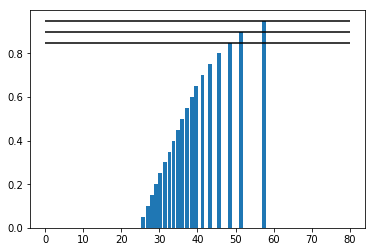

In [145]:
plt.bar(height=tdm_weekends_tdm_lt_200_q.index, x=tdm_weekends_tdm_lt_200_q.values, align='center', width=1.0);
plt.hlines(xmin=0, xmax=80, y=.95)
plt.hlines(xmin=0, xmax=80, y=.90)
plt.hlines(xmin=0, xmax=80, y=.85)

In [146]:
print("trip duration longer than 3 hours: {:.2f}%".format(100*(df1.trip_duration_minutes > 180).mean()))

trip duration longer than 3 hours: 0.38%


In [147]:
import matplotlib.pyplot as plt

df1.groupby(['pickup_zone']).size()

pickup_zone
Allerton/Pelham Gardens              0
Alphabet City                        0
Arden Heights                        0
Arrochar/Fort Wadsworth              0
Astoria                              0
Astoria Park                         0
Auburndale                           0
Baisley Park                         0
Bath Beach                           0
Battery Park                         0
Battery Park City                    0
Bay Ridge                            0
Bay Terrace/Fort Totten              0
Bayside                              0
Bedford                              0
Bedford Park                         0
Bellerose                            0
Belmont                              0
Bensonhurst East                     0
Bensonhurst West                     0
Bloomfield/Emerson Hill              0
Bloomingdale                         0
Boerum Hill                          0
Borough Park                         0
Briarwood/Jamaica Hills              0
Brighton Beac

In [148]:
trips_to_newark_airport = df[df.dropoff_zone == 'Newark Airport']


In [149]:
count_of_trips_to_ewr_per_pickup_zone = trips_to_newark_airport.groupby(['pickup_zone']).size().sort_values()
count_of_trips_to_ewr_per_pickup_zone[count_of_trips_to_ewr_per_pickup_zone > 100]

pickup_zone
Boerum Hill                         115
Hamilton Heights                    121
Washington Heights South            131
Central Harlem North                133
East Harlem North                   135
Brooklyn Heights                    147
Two Bridges/Seward Park             170
Alphabet City                       192
Downtown Brooklyn/MetroTech         234
Central Harlem                      302
East Harlem South                   385
Bloomingdale                        391
Stuy Town/Peter Cooper Village      392
Chinatown                           418
Seaport                             593
Morningside Heights                 864
Yorkville East                      868
Kips Bay                            872
Lenox Hill East                    1030
Manhattan Valley                   1132
Yorkville West                     1219
Lenox Hill West                    1347
Financial District South           1463
Greenwich Village South            1573
Sutton Place/Turtle Bay Nort

## Correlation with weekday

## Correlation with time of year

## Correlation with time of day